In [100]:
#Importing Libraries, Setting Env
import json
from pprint import pprint
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', 35)

#### Sample Data Structure

In [101]:
with open('refugees to Kenya.json') as f:
    data = json.load(f)
    
pprint(data)

{'chartType': 'areaspline',
 'color': '#3c8dbc',
 'currentSeries': 1,
 'data': {'geoMasterId': {'adm': 'Country',
                          'id': 178,
                          'lat': 0.537253,
                          'lon': 37.8802,
                          'name': 'Kenya'},
          'source': 'UNHCR',
          'timeseries': [{'data_date': '2013-12-31',
                          'individuals': 46176,
                          'unix_timestamp': 1388448000},
                         {'data_date': '2014-03-31',
                          'individuals': 63211,
                          'unix_timestamp': 1396224000},
                         {'data_date': '2014-06-30',
                          'individuals': 76310,
                          'unix_timestamp': 1404086400},
                         {'data_date': '2014-09-30',
                          'individuals': 87205,
                          'unix_timestamp': 1412035200},
                         {'data_date': '2014-12-31',
      

###  Extract each country data -> turn into csv file

In [102]:
date = []
timestamp = []
individuals = [] 
_country = []
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

for country in country_list:
    date = []
    timestamp = []
    individuals = [] 
    _country = []
    with open('refugees to ' + country + '.json') as f:
        data = json.load(f)
        data_country = data['data']['timeseries']    
        
    for data in data_country:
        date.append(data['data_date'])
        timestamp.append(data['unix_timestamp'])
        individuals.append(data['individuals'])
        _country.append(country)
        
    refugees_to_all_countries_df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals, 'to': _country})
    refugees_to_all_countries_df['Year']=[d.split('-')[0] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df['Month']=[d.split('-')[1] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df['Day']=[d.split('-')[2] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df = refugees_to_all_countries_df.sort_values(by=['timestamp'])
    #refugees_to_all_countries_df.to_csv("refugees_to_"+ country +"_cleaned.csv", sep=',')
    print("Refugees To : " + country)
    display(refugees_to_all_countries_df.head(3))
    

Refugees To : DRC


,date,timestamp,individuals,to,Year,Month,Day
0,2014-10-31,1414713600,1796,DRC,2014,10,31
1,2014-11-30,1417305600,1796,DRC,2014,11,30
2,2014-12-31,1419984000,1796,DRC,2014,12,31


Refugees To : Ethiopia


,date,timestamp,individuals,to,Year,Month,Day
0,2013-12-31,1388448000,68465,Ethiopia,2013,12,31
1,2014-03-31,1396224000,157422,Ethiopia,2014,03,31
2,2014-06-30,1404086400,208820,Ethiopia,2014,06,30


Refugees To : Kenya


,date,timestamp,individuals,to,Year,Month,Day
0,2013-12-31,1388448000,46176,Kenya,2013,12,31
1,2014-03-31,1396224000,63211,Kenya,2014,03,31
2,2014-06-30,1404086400,76310,Kenya,2014,06,30


Refugees To : Sudan


,date,timestamp,individuals,to,Year,Month,Day
0,2014-03-31,1396224000,59580,Sudan,2014,03,31
1,2014-06-30,1404086400,85972,Sudan,2014,06,30
2,2014-09-30,1412035200,96603,Sudan,2014,09,30


Refugees To : Uganda


,date,timestamp,individuals,to,Year,Month,Day
0,2012-12-31,1356912000,12524,Uganda,2012,12,31
1,2013-12-31,1388448000,25274,Uganda,2013,12,31
2,2014-03-31,1396224000,118051,Uganda,2014,03,31


### Merge all countries data

In [103]:
date = []
timestamp = []
individuals = [] 
_country = []
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

for country in country_list:
    with open('refugees to ' + country + '.json') as f:
        data = json.load(f)
        data_country = data['data']['timeseries']    
        
    for data in data_country:
        date.append(data['data_date'])
        timestamp.append(data['unix_timestamp'])
        individuals.append(data['individuals'])
        _country.append(country)

refugees_to_all_countries_df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals, 'to': _country})
refugees_to_all_countries_df['Year']=[d.split('-')[0] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df['Month']=[d.split('-')[1] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df['Day']=[d.split('-')[2] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df = refugees_to_all_countries_df.sort_values(by=['timestamp'])
refugees_to_all_countries_df.head(50)
#refugees_to_all_countries_df.to_csv("refugees_to_neighbor_countries_cleaned.csv", sep=',')

,date,timestamp,individuals,to,Year,Month,Day
200,2012-12-31,1356912000,12524,Uganda,2012,12,31
98,2013-12-31,1388448000,46176,Kenya,2013,12,31
49,2013-12-31,1388448000,68465,Ethiopia,2013,12,31
201,2013-12-31,1388448000,25274,Uganda,2013,12,31
146,2014-03-31,1396224000,59580,Sudan,2014,03,31
99,2014-03-31,1396224000,63211,Kenya,2014,03,31
50,2014-03-31,1396224000,157422,Ethiopia,2014,03,31
202,2014-03-31,1396224000,118051,Uganda,2014,03,31
100,2014-06-30,1404086400,76310,Kenya,2014,06,30
147,2014-06-30,1404086400,85972,Sudan,2014,06,30


#### Refugees from south sudan 

In [104]:
date = []
timestamp = []
individuals = [] 

with open('refugees from south-sudan all.json') as f:
    data = json.load(f)
    pprint(data)
    
data_country = data['data']['timeseries']  
for data in data_country:
    date.append(data['data_date'])
    timestamp.append(data['unix_timestamp'])
    individuals.append(data['individuals'])

df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals})
df['Year']=[d.split('-')[0] for d in df.date]
df['Month']=[d.split('-')[1] for d in df.date]
df['Day']=[d.split('-')[2] for d in df.date]
df.head(3)
df.to_csv('refugees from south-sudan all_cleaned.csv', sep = ',')

{'chartType': 'areaspline',
 'color': '#3c8dbc',
 'currentSeries': 1,
 'data': {'source': 'UNHCR, Office of the Prime Minister, IOM, SRCS, COR, HAC',
          'timeseries': [{'data_date': '2014-03-31',
                          'individuals': 398264,
                          'unix_timestamp': 1396224000},
                         {'data_date': '2014-06-30',
                          'individuals': 513868,
                          'unix_timestamp': 1404086400},
                         {'data_date': '2014-09-30',
                          'individuals': 589560,
                          'unix_timestamp': 1412035200},
                         {'data_date': '2014-10-31',
                          'individuals': 591356,
                          'unix_timestamp': 1414713600},
                         {'data_date': '2014-11-30',
                          'individuals': 591356,
                          'unix_timestamp': 1417305600},
                         {'data_date': '2014-12-31',
  

In [105]:
df.head(3)

,date,timestamp,individuals,Year,Month,Day
0,2014-03-31,1396224000,398264,2014,03,31
1,2014-06-30,1404086400,513868,2014,06,30
2,2014-09-30,1412035200,589560,2014,09,30


In [108]:
df['Diff'] = df['individuals'].diff()
df.head(20)

,date,timestamp,individuals,Year,Month,Day,Diff
0,2014-03-31,1396224000,398264,2014,03,31,NaN
1,2014-06-30,1404086400,513868,2014,06,30,115604.0
2,2014-09-30,1412035200,589560,2014,09,30,75692.0
3,2014-10-31,1414713600,591356,2014,10,31,1796.0
4,2014-11-30,1417305600,591356,2014,11,30,0.0
5,2014-12-31,1419984000,616149,2014,12,31,24793.0
6,2015-01-31,1422662400,617634,2015,01,31,1485.0
7,2015-02-28,1425081600,625069,2015,02,28,7435.0
8,2015-03-31,1427760000,651450,2015,03,31,26381.0
9,2015-04-30,1430352000,655276,2015,04,30,3826.0


In [109]:
df.to_csv('refugees_from_southsudan_with_difference.csv', sep = ',')

In [113]:
%%HTML
<div class='tableauPlaceholder' id='viz1547905931207' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RefugeesFromSouthSudanTrend&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547905931207');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

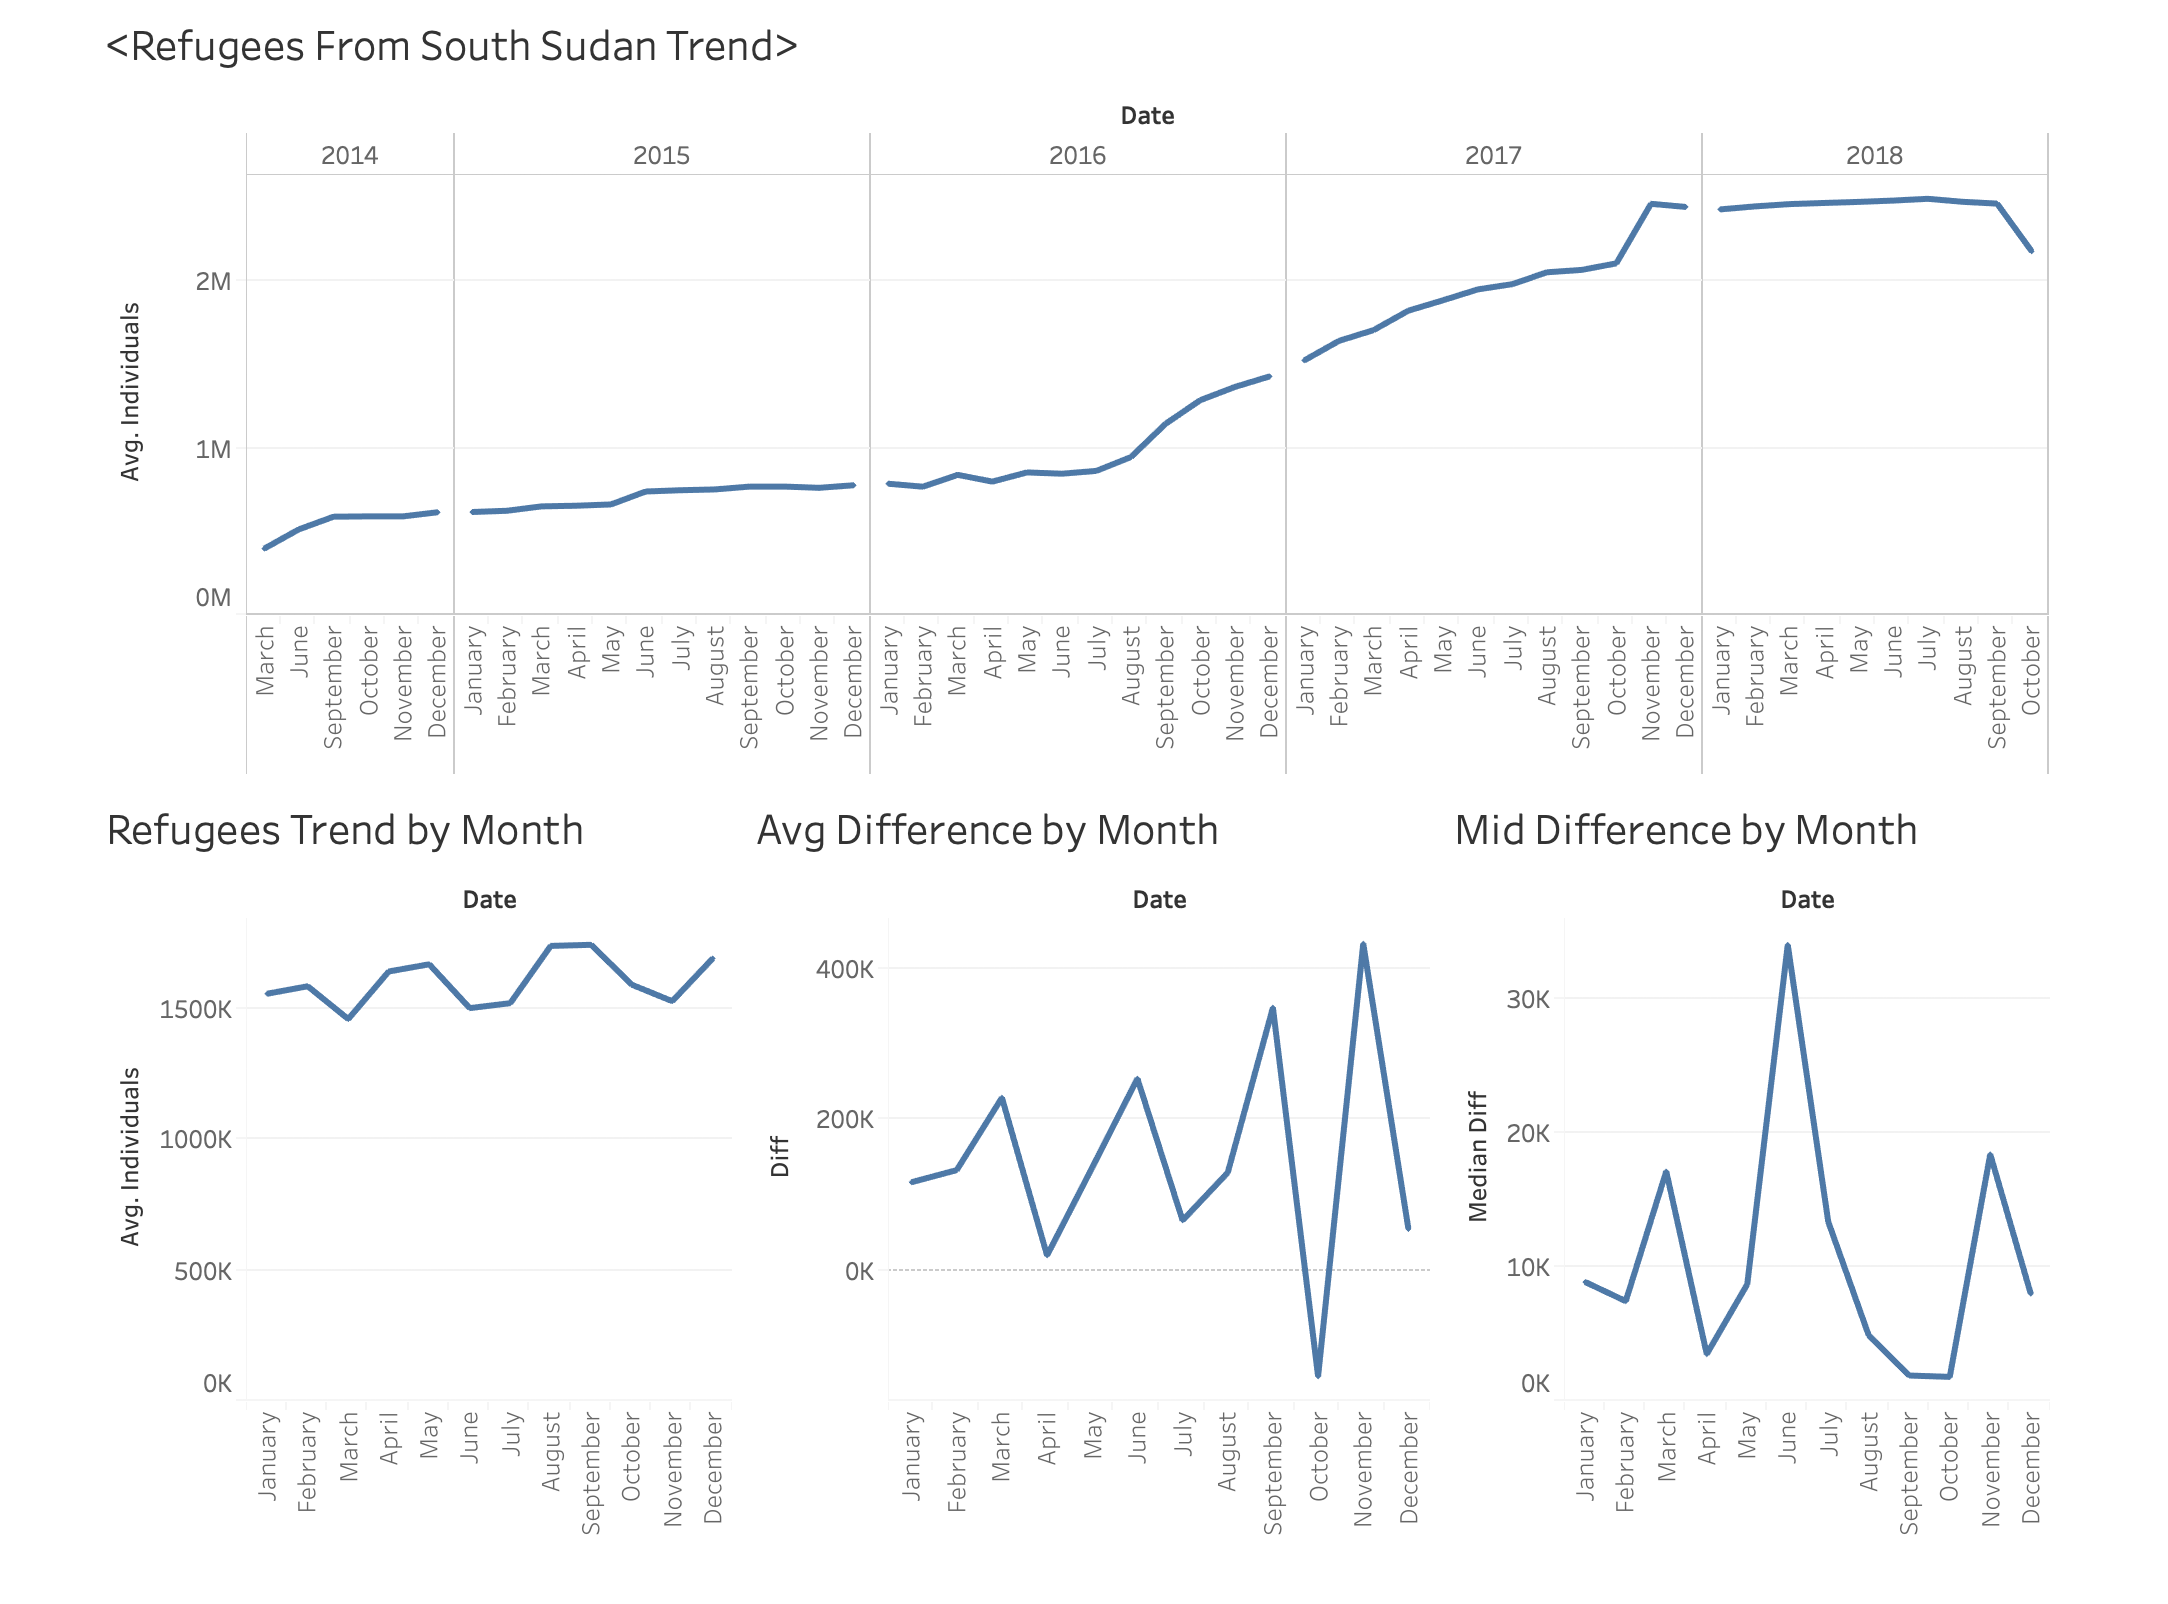

In [115]:
#In case above link doesn't render image in github
from IPython.display import Image
Image(filename='img/Refugees_from south_sudan_trend.png') 

### Prediction of future refugees from South Sudan

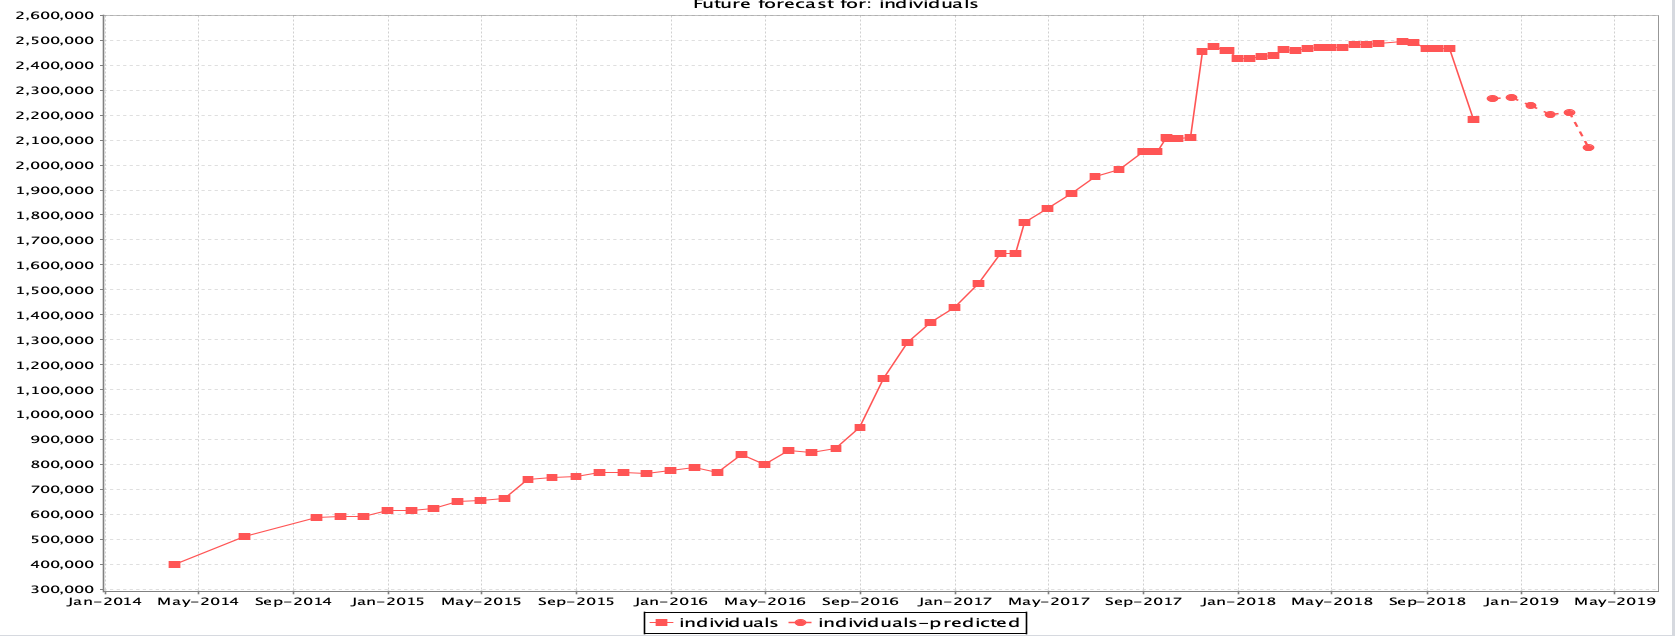

In [120]:
#By Timeseries forecasting
Image(filename='Results_RFSS/Forecast_From_SouthSudan_Full.png') 

2018-11-24*  2265570.3714 <br/>
2018-12-19*  2270693.0898 <br/>
2019-01-12*  2239656.3449 <br/>
2019-02-06*  2201717.8884 <br/>
2019-03-03*  2208591.5167 <br/>
2019-03-27*  2068579.1076 <br/>

##### Huge drop in October 2018
Appearently caused by signing end civil war agreenment. "South Sudan rebel leader Riek Machar returned to the capital Juba on October 31st, 2018 to celebrate a peace deal, more than two years after fierce fighting erupted in the city and forced him to flee the country."(Source: https://www.reuters.com/article/us-southsudan-peaceconference/south-sudan-rebel-leader-machar-returns-to-mark-peace-deal-idUSKCN1N50LI)

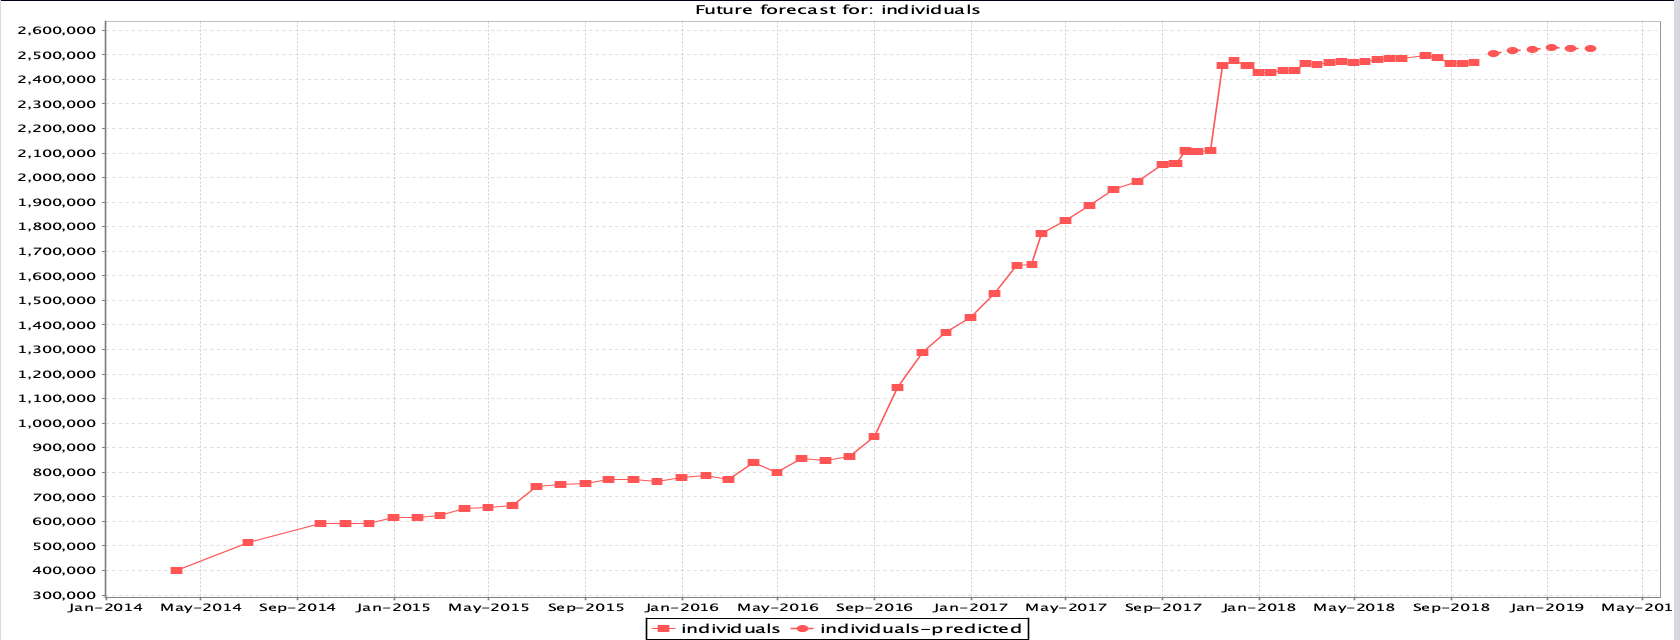

In [121]:
#If remove the huge drop row from the dataset
Image(filename='Results_RFSS/Forecast_From_SouthSudan_full_withoutLatest.png') 

### Predict with Linear Regression

=== Classifier model (full training set) ===

Linear Regression Model

individuals =

      0.0185 * timestamp +
-25845083.2239

Time taken to build model: 0 seconds

=== Summary ===

Correlation coefficient                  0.9539

Mean absolute error                 180251.8474

Root mean squared error             229542.1883

Relative absolute error                 24.9258 %

Root relative squared error             29.5765 %

Total Number of Instances               69     

## The MAE is fucking big (UNPREDICTABLE)